# Ciencia dos Dados - Projeto 1 
                      
  ##### O objetivo deste estudo é descobrir se existe uma correlação entre o percentual de mortes anuais por HIV e o IDH dos países, e se o percenteual de população urbana afeta no mesmo. Para isso, foram selecionadas bases de dados no Gapminder, e as escolhidas para a análise tem como conteúdo o número de mortes anuais por HIV(que posteriormente foi tranformado para taxa de mortes anuais por HIV ) e a taxa de população urbana, ambas em função da população total. O ano escolhido é 2009 pois possui uma grande quantidade de informações para todas as variáveis. A análise foi baseada na interpretação dos gráficos possíveis para variáveis quantitativas.

Imports:

In [40]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

Leitura dos aqruivos e atribuição de nome aos mesmos:

In [41]:
hiv = pd.read_excel("annual_hiv_deaths_number_all_ages.xlsx")
idh = pd.read_excel("hdi_human_development_index.xlsx")
urb = pd.read_excel("urban_population_percent_of_total.xlsx")
pop = pd.read_excel("population_total.xlsx")

Seleção e "fatiamento" dos dados das três variáveis, levando em conta que o ano selecionado foi o de 2009 por maior disponibilidade de dados(além disso foi feito o set de index, para que o nomes dos países passase a ser a primeira coluna):

In [42]:
#IDH
idh_2009 = idh.loc[:, ["geo",2009]].set_index("geo")
idh_2009.columns = ['IDH']
#Mortes anuais por HIV
hiv_2009 = hiv.loc[:, ["geo",2009]].set_index("geo")
hiv_2009.columns = ['Mortes anuais por HIV']
#População Urbana %
urb_2009 = urb.loc[:, ["geo",2009]].set_index("geo")
urb_2009.columns = ['População Urbana %']
#População
pop_2009 = pop.loc[:, ["geo",2009]].set_index("geo")
pop_2009.columns = ['População Total']

A base de dados de população dos países foi adicionada pois para que os dados de Mortes anuais por HIV pudessem ser analisados corretamente foi necessário levar em conta a população de cada país no ano escolhido, de forma que os dados de mortes pudessem se tornar uma porcentagem. Assim países que tem uma enorme população e países que tem um população menor podem ser analisados sem ter dados muito diferentes, como por exemplo 340000 mortes por ano que é o valor maximo, enquanto a média é de 11 000 mortes por ano(dados obtidos antes da transformação para porcentagem). 

In [39]:
pop_hiv_2009 = pop_2009.join(hiv_2009)
pht = pop_hiv_2009.rename(index=str,columns={"População Total":"pop","Mortes anuais por HIV":"Mortes"}).dropna()
pht["Mortes anuais por HIV %"] = pht["Mortes"]/pht["pop"]
pht_2009 = pht["Mortes anuais por HIV %"]

Realizou-se o join das variáveis, podendo assim uni-las em uma mesma tabela, com os dados referentes ao mesmo ano e aos países que possuiam dados disponíveis(tarefa que é realizada automaticamente ao aplicar o .join):

In [43]:
data = idh_2009.join(pht_2009, how="inner")
base = data.join(urb_2009,how="inner")

Função utilizada para marcar a linha onde se encontra a média dos dados, nos histogramas plotados: 

In [44]:
#função para achar a linha de média
def verticalLine(plot, x, y):
    plot.axvline(x, color='b', linestyle="dashed", linewidth=2)
    plot.text(x, y, 'med', color='g')    

Análise individual das variáveis:

# Percentual de Mortes anuais por HIV:
    

In [45]:
base["Mortes anuais por HIV %"].describe()

count    1.470000e+02
mean     5.973313e-04
std      1.283217e-03
min      8.000000e-07
25%      1.909335e-05
50%      1.209677e-04
75%      4.618572e-04
max      7.101449e-03
Name: Mortes anuais por HIV %, dtype: float64

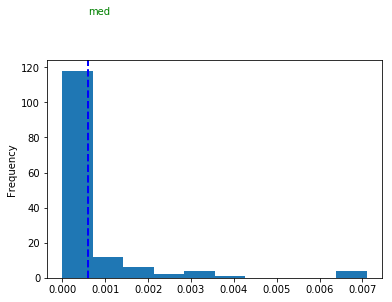

In [49]:
verticalLine(base["Mortes anuais por HIV %"].plot.hist(), base["Mortes anuais por HIV %"].mean(), 150)

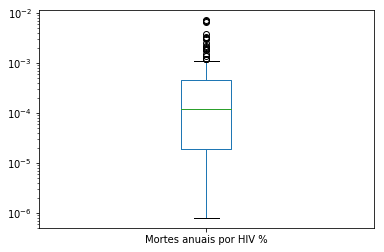

In [47]:
base["Mortes anuais por HIV %"].plot.box()
ax = plt.gca()
ax.set_yscale('log')

##### Análise dos dados relativos a mortes anuais por HIV: 

A partir dos dados e gráficos obtidos pode-se perceber que o número de mortes por HIV ocorre predominantemente em uma faixa de 0,0001% a 0,001 % da população total, com uma grande concentração em valores mais baixos. Mas também é possível notar que (como demonstrado por sua cauda para a direita, presente no histograma) há alguns dados dispersos e distantes da concentração, o que acaba elevando a média e tornando o desvio padrão alto. Isto pode ser representado pelo valor máximo, que é de 0,007%, enquanto a média é de aproximadamente 0,0005%. Tais valores destoantes, chamados de outliers, podem ser facilmente identificados no boxplot, e neste são representados pelas bolinhas que estão distantes de todos os quartis, da média e da mediana(que estão dispostos de uma maneira equilibrada levando em conta a escala logaritimica), o que comprova que mesmo havendo uma grande concentração de valores em uma certa faixa(que pode ser visto no espaço entre os 1 e 3 quartil, que contém a maioria dos dados), existem alguns casos que destoam e acabam por prejudicar a interpretação dos resultados obtidos através dos testes aplicados à amostra.

# Percentual de população urbana:
    

In [28]:
base["População Urbana %"].describe()

count    147.000000
mean      55.187415
std       22.920340
min        9.250000
25%       36.200000
50%       55.200000
75%       73.850000
max      100.000000
Name: População Urbana %, dtype: float64

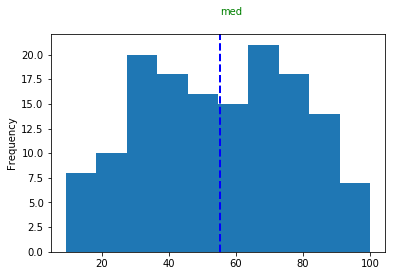

In [29]:
verticalLine(base["População Urbana %"].plot.hist(), base["População Urbana %"].mean(), 24)

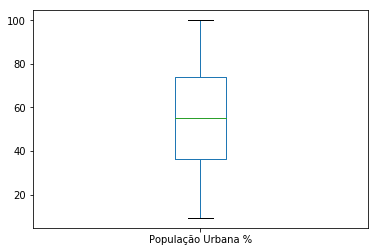

In [30]:
base["População Urbana %"].plot.box()

##### Análise dos dados relativos ao percentual de população urbana:

<p>A partir da análise do histograma e dos dados foi possível constatar que o percentual de população urbana nos países no ano de 2009 foi muito disperso e equilibrado, contendo uma grande concentração de valores em quase todas as porcentagens, principalmente de 30% a 90% aproximadamente, com exceção das faixas de 0 a 20% e de 90 a 100% onde a ocorrência é menor, o que mostra que a maioria dos países análisados possuem um certo equilíbrio entre população rural e urbana. O mesmo pode ser comprovado ao olharmos o boxplot, que mostra uma boa simetria entre os quartis, que estão distantes o que mostra essa dispersão, e com uma média de aproximadamente 55% e um desvio padrão de 23%, o que reafirma o que ja foi dito.</p>

# Análise conjunta das variáveis e conclusões: 

Função utilizada para a criação das retas MMQ utlizadas nos gráficos de dispersão:

In [31]:
 
def reta(dados_x, dados_y, Title, x, y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    ax = plt.gca()
    ax.set_xscale('log')
    plt.title(Title)
    plt.xlabel(x)
    plt.ylabel(y)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Gráficos de dispersão:

# Mortes anuais por HIV  X  IDH: 

Código do plot do gráfico de dispersão entre Mortes anuais por HIV e IDH:

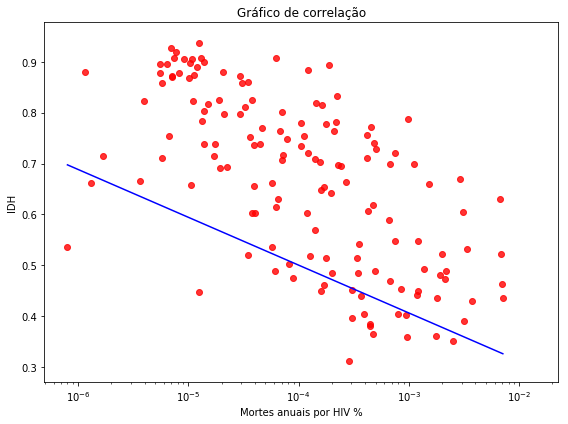

In [32]:
reta(base['Mortes anuais por HIV %'], base['IDH'], "Gráfico de correlação", "Mortes anuais por HIV %", "IDH")

Método utilizado para a obtenção do coeficiente de correlação entre as variáveis:

In [33]:
base.corr(min_periods=1)

,IDH,Mortes anuais por HIV %,População Urbana %
IDH,1.000000,-0.398393,0.756644
Mortes anuais por HIV %,-0.398393,1.000000,-0.316055
População Urbana %,0.756644,-0.316055,1.000000


#### Conclusão:

Ao relacionar o IDH em 2009 e o percentual anual de mortes por HIV pode-se concluir que não existe uma correlação entre os mesmos, pois quando olhamos o gráfico podemos notar que não há nenhum padrão consistente e que o percentual de mortes por HIV variam independente do IDH. Quando olhamos o índice de correlação o mesmo se confirma pois este é de -0.39, quando deveria ser próximo de -1 para poder ser considerado correlacionado. E além disso os pontos no gráfico estão muito dispersos em relação a reta MMQ, o que confirma o coeficiente de correlação que nem sempre é confiável. Porém pode-se criar uma certa dúvida em relação ao que foi dito acima uma vez que vemos que existe uma grande concentração de dados dos países com IDH próximo a 0.9 na área do gráfico que se refere a baixo índice de mortes e um baixo número de países com IDH baixo nessa mesma área. Porém esse padrão não se confirma em todo o gráfico, pois em sua parte central os dados estão muito dispersos e bem diluidos entre os IDHs. Assim a correlação entre ambas as variáveis não pode ser comprovada, mesmo que seu gráfico cause essa impressão.

# Percentual de população urbana X IDH:

Código do plot do gráfico de dispersão entre percentual de população urbana e IDH:

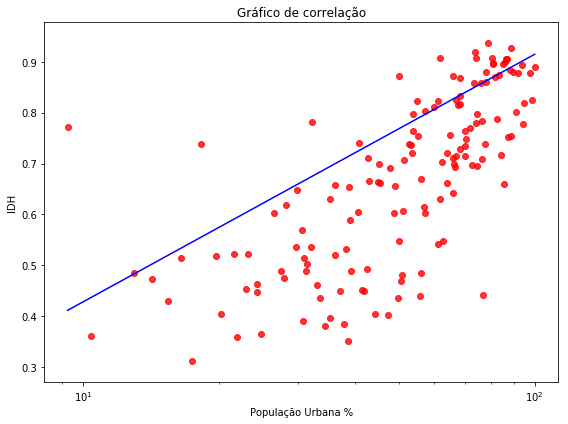

In [34]:
reta(base['População Urbana %'], base['IDH'], "Gráfico de correlação", "População Urbana %", "IDH")

Método utilizado para a obtenção do coeficiente de correlação entre as variáveis:

In [35]:
base.corr(min_periods=1)

,IDH,Mortes anuais por HIV %,População Urbana %
IDH,1.000000,-0.398393,0.756644
Mortes anuais por HIV %,-0.398393,1.000000,-0.316055
População Urbana %,0.756644,-0.316055,1.000000


#### Conclusão: 

Ao relacionarmos o IDH com o índice percentual de população urbana e obtermos os gráficos, a reta MMQ e o coeficiente de correlação e analisa-los, o que se conlcui é que há uma relação entre as variáveis, pois quanto maior o IDH maior o percentual de população urbana, e além disso ao olharmos a reta podemos ver que os dados seguem o mesmo sentido e inclinação da mesma, e que ela esta de certa forma bem localizada meio aos pontos. E por fim ao analizarmos o coeficiente de correlação vemos que este é de 0.75(condiz com a inclinação da reta, tornando-o válido), ou seja próximo de 1, tornando assim possível a conclusão de correlação entre os dados. Desta forma uma interpretação que pode-se fazer desses dados é que os países que possuem um IDH mais alto tendem a serem mais desenvolvidos economicamente(não somente economicamente, mas em todos os ambitos), e diferentemente dos países com IDH mais baixo, baseiam sua economia na indústria, enquanto os que foram citados possuem suas economias baseadas na agricultura, fazendo assim com que a maior parte da população viva nas áreas rurais, enquanto nos países mais industrializados (com maior IDH) a população viva majoritareamente nas áreas urbanas.

# Percentual de Mortes anuais por HIV  X  Percentual de população urbana

Código do plot do gráfico de dispersão entre mortes anuais por HIV e percentual de população urbana:

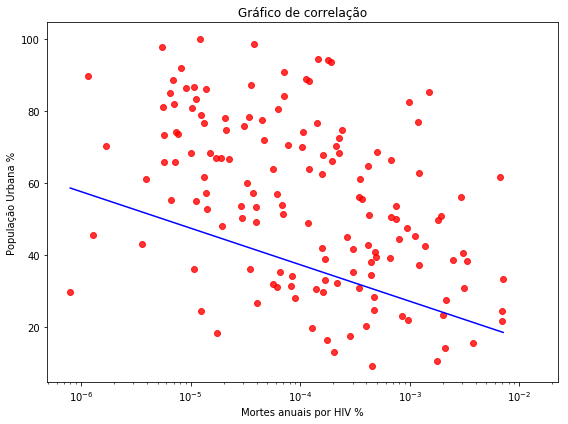

In [36]:
reta(base['Mortes anuais por HIV %'], base['População Urbana %'], "Gráfico de correlação", "Mortes anuais por HIV %", "População Urbana %")

Método utilizado para a obtenção do coeficiente de correlação entre as variáveis:

In [38]:
base.corr(min_periods=1)

,IDH,Mortes anuais por HIV %,População Urbana %
IDH,1.000000,-0.398393,0.756644
Mortes anuais por HIV %,-0.398393,1.000000,-0.316055
População Urbana %,0.756644,-0.316055,1.000000


#### Conclusão: 

Ao analisar os dados disponíveis no gráfico de dispersão e relaciona-los com a reta MMQ e com o coeficiente de correlação pode-se concluir que não ha uma correlação entre os dados analisados, pois não há um padrão perceptível, o coeficiente de correlação que deveria ser de -1 é de -0.31, ou seja, não correlacionado. Além disso a reta MMQ reafirma o que foi dito acima e comprova o coeficiente de correlação, pois pode-se ver que os dados em geral não seguem de forma muito notável a inclinação da mesma.